In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("https://github.com/campusx-official/100-days-of-machine-learning/raw/refs/heads/main/day35-complete-case-analysis/data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols=[var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8505,0.666,no_enrollment,Graduate,17.0,111.0
8604,0.920,no_enrollment,Graduate,16.0,91.0
16757,0.624,no_enrollment,Graduate,8.0,91.0
669,0.926,Full time course,Masters,9.0,88.0
12035,0.479,NaN,Graduate,3.0,23.0


In [18]:
len(df[cols].dropna())

17182

In [19]:
len(df)

19158

In [20]:
17182/19158

0.8968577095730244

In [22]:
new_df=df[cols].dropna()
new_df.shape,df.shape

((17182, 5), (19158, 13))

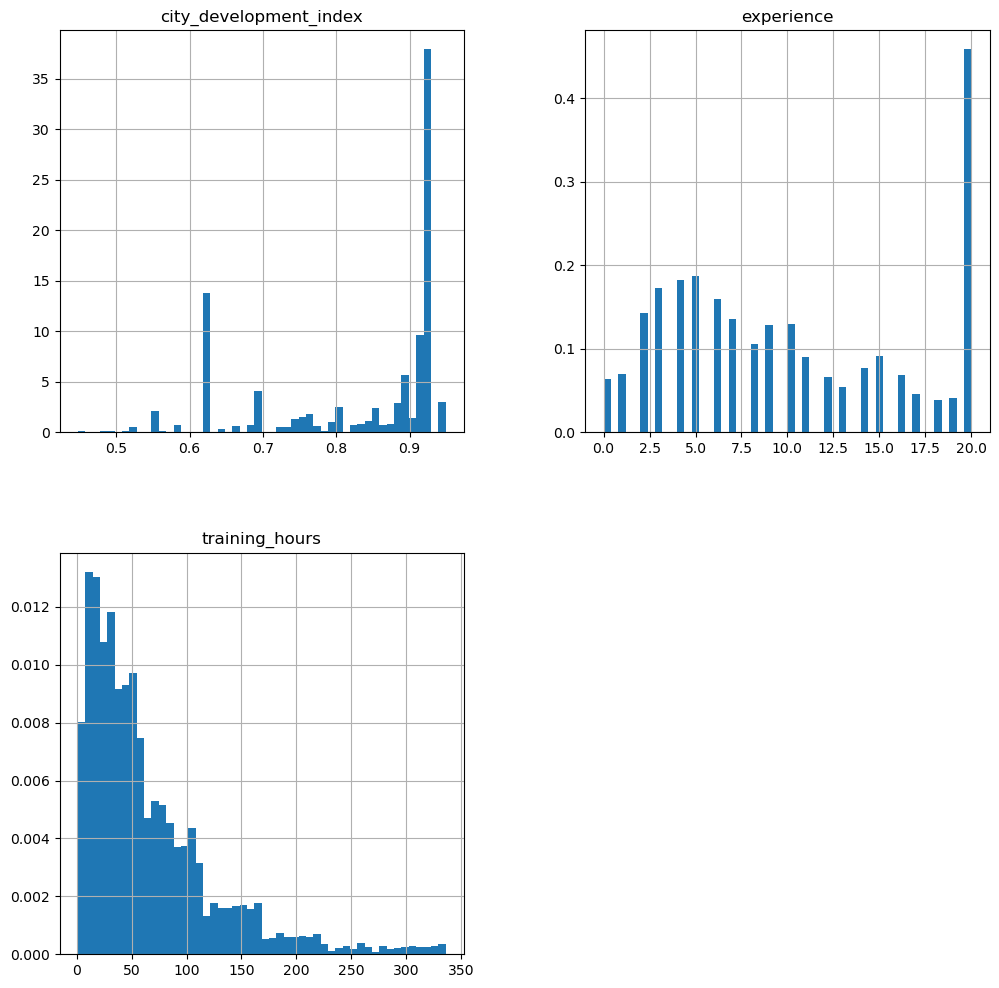

In [29]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

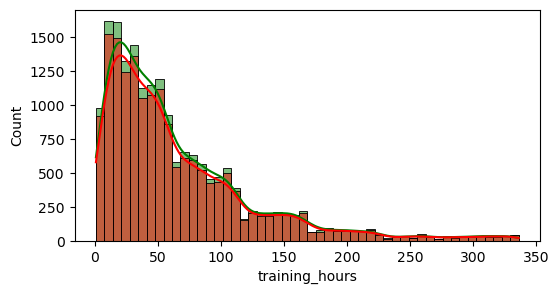

In [35]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.histplot(df["training_hours"],color='green',bins=50,kde=True)
plt.subplot(1,1,1)
sns.histplot(new_df["training_hours"],color='red',bins=50,kde=True)
plt.show()





<Axes: >

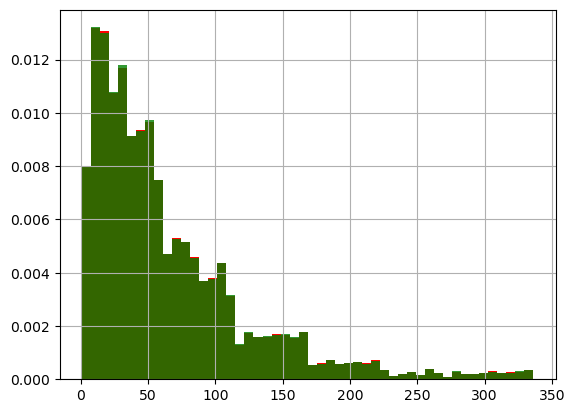

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

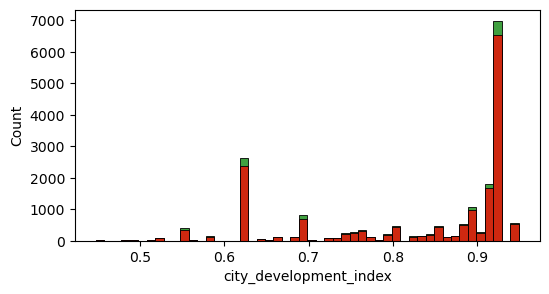

In [41]:
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
sns.histplot(df["city_development_index"],color='green',bins=50)
plt.subplot(1,1,1)
sns.histplot(new_df["city_development_index"],color='red',bins=50)
plt.show()


In [45]:
temp = pd.concat([         
            df['enrolled_university'].value_counts() / len(df),
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

temp.columns=["Orginal","CCA"]

temp

,Orginal,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [51]:
temp=pd.concat(
    [df["education_level"].value_counts()/len(df),
    new_df["education_level"].value_counts()/len(new_df)],axis=1
)
temp.columns=["Orginal","CCA"]
temp

,Orginal,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
